In [2]:
import math
import matplotlib.pyplot as plt
import numpy as np


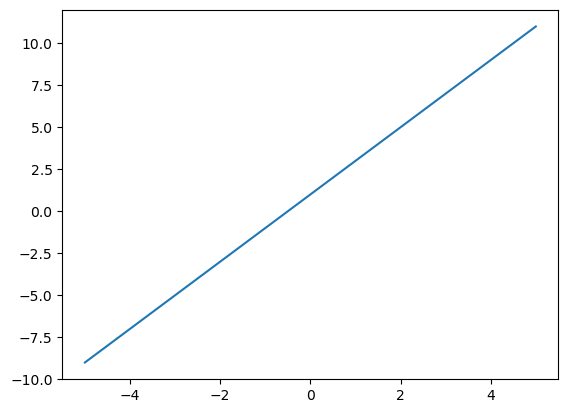

In [3]:
#zadacha 1

nodes = np.array([0, 0.5,1,1.5])
values = np.array([1,2,3,4])

def basis_pol(x):
    return np.array([1, x, x**2, x**3])
n = 4
A = np.zeros([n, n])
for i in range(0,4):
    A[i] = basis_pol(nodes[i])
a = np.linalg.solve(A, values)
def poly(x):
    return a[0] + a[1]*x+a[2]*x**2+a[3]*x**3

x = np.linspace(-5,5,100)
plt.plot(x, poly(x))
plt.show()

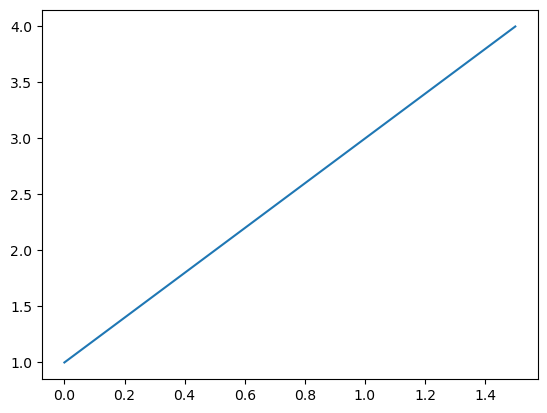

In [7]:
x = np.linspace(0, 1.5, 10)
def basisPoly(x, idx, nodes):
    p = 1
    for i in range(len(nodes)):
        if idx == i:
            continue
        p *= (x - nodes[i]) / ( nodes[idx] - nodes[i])
    return p

def lagrangePoly(x, nodes, values):
    q = 0
    for i in range(len(nodes)):
        q += basisPoly(x, i, nodes) * values[i]
    return q

plt.plot(x, lagrangePoly(x, nodes,values))
plt.show()
        

0.742312933103883


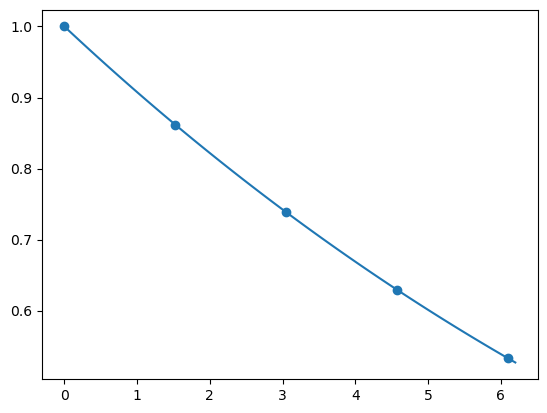

In [8]:
#zadacha 2
nodes = np.array([0,1.525, 3.05, 4.575, 6.1])
values = np.array([1,0.8617, 0.7385, 0.6292, 0.5328])

print(lagrangePoly(3, nodes, values))
x = np.linspace(0, 6.2, 100)
plt.plot(x, lagrangePoly(x,nodes,values))
plt.scatter(nodes, values)
plt.show()


1.161829375


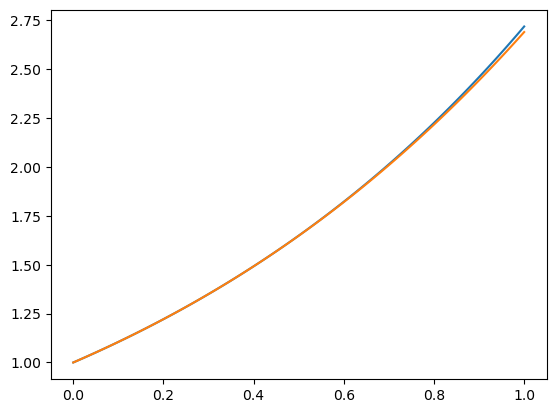

In [13]:
#zad 3

nodes = np.array([0, 0.1, 0.2, 0.3])
values = np.array([1, 1.10517, 1.2214, 1.34986])
def f(x):
    return np.exp(x)
x=np.linspace(0, 1, 100)
plt.plot(x, f(x))
plt.plot(x, lagrangePoly(x, nodes, values))
print(lagrangePoly(0.15, nodes, values))

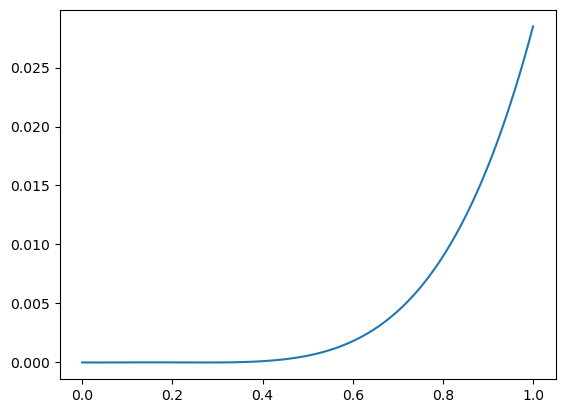

In [16]:
def absolute_error(x):
    return f(x) - lagrangePoly(x,nodes, values)
plt.plot(x, absolute_error(x))

3.1637315802562576e-06


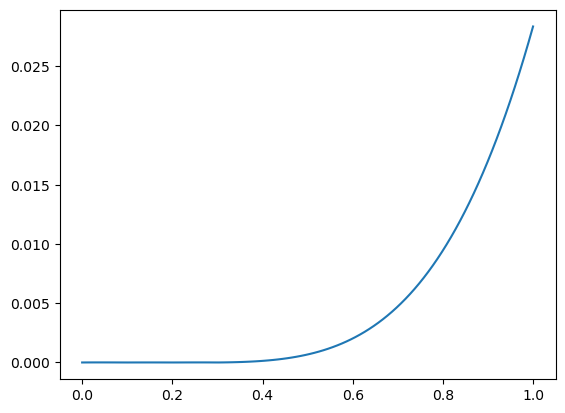

In [20]:
# x is in [0, 0.3]
# n+1 derivative where n is the number of nodes so we need n+1 derivative
#f(x) = exp^x
#f(3+1)(x) = exp^x
#max value is for z = 0.3

ocenka_error = (np.exp(0.3)/24) *(0.15-0)*(0.15-0.1)*(0.15-0.2)*(0.15-0.3)

print(ocenka_error)

def majorate_func(x):
    #max value of a func
    return (np.exp(0.3)/24)*abs((x-0.1)*(x-0.2)*(x-0.3)*(x-0))

plt.plot(x, majorate_func(x))

In [4]:
#zad 4
import sympy as sp

def razdelena_razlika(nodes, values):
    n = len(nodes)
    if n == 1:
        return values[0]
    return (razdelena_razlika(nodes[1:], values[1:]) - razdelena_razlika(nodes[0:n-1], values[0:n-1])) /(nodes[n-1]-nodes[0])

def newtonPoly(x, nodes, values):
    p = 0
    for i in range(len(nodes)):
        q = razdelena_razlika(nodes[0:i+1], values[0:i+1])
        for j in range(i):
            q*=(x-nodes[j])
        p+=q
    return p



nodes = np.array([-3, 2, -1, 3, 1])
values = np.array([0, 5, -4, 12, 0])

# razdelena_razlika(x, nodes, values)
plt.plot(x, newtonPoly(x, nodes, values))
plt.show()
symbolX = sp.symbols('x')

print(sp.expand(newtonPoly(symbolX, nodes, values)))




NameError: name 'x' is not defined

5.4
6.200000000000001
6.343999999999999


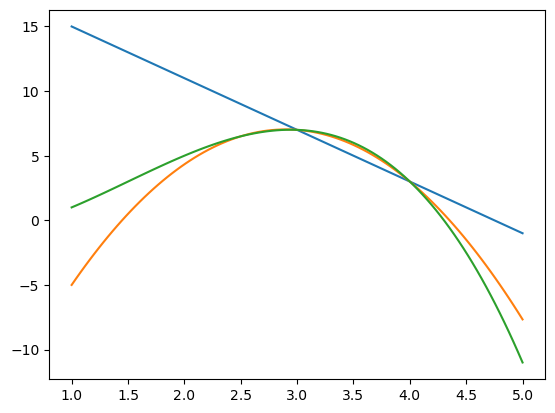

In [43]:
#zad 5
x = np.linspace(1, 5, 100)
nodes = np.array([1, 2, 2.5, 3, 4, 5])
values = np.array([0, 5, 6.5, 7 ,3, 1])

def f1(x):
    return newtonPoly(x, nodes[3:5], values[3:5])
def f2(x):
    return newtonPoly(x, nodes[2:5], values[2:5])
def f3(x):
    return newtonPoly(x, nodes[1:5], values[1:5])

print(f1(3.4))
print(f2(3.4))
print(f3(3.4))

plt.plot(x, f1(x))
plt.plot(x, f2(x))
plt.plot(x, f3(x))



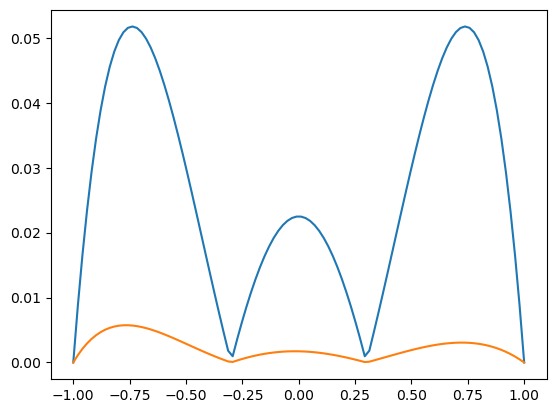

In [56]:
#zad 6
x = np.linspace(-1, 1,100)
nodes = np.array([-1, -0.3, 0.3, 1])

def f(x):
    return np.log(x+2)
    
values = np.array([f(item) for item in nodes])

def error(x):
    return abs((1/4)*(x+1)*(x+0.3)*(x-1)*(x-0.3))


def g(x):
    return lagrangePoly(x, nodes, values)
# plt.plot(x, g(x))
plt.plot(x, error(x))

plt.plot(x, abs(f(x) - g(x)))
plt.show()

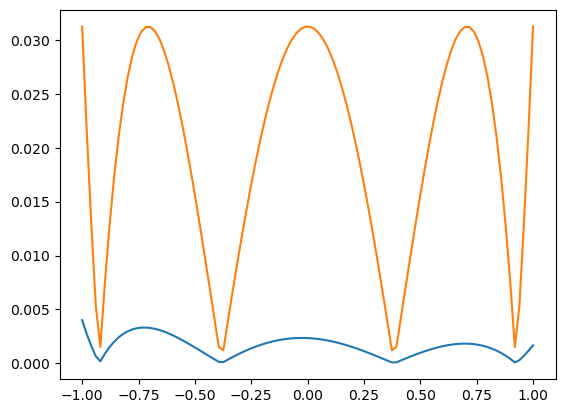

In [67]:
n = 4
nodes = np.array([np.cos((2*k-1)*np.pi/(2*n)) for k in range(1,5)])
values = np.array([f(item) for item in nodes])
p = lagrangePoly(x, nodes,values)

def error_2(x):
    q = 1/4
    for i in range(0,4):
        q *= (x - nodes[i])
    return abs(q)

plt.plot(x, abs(f(x) - p))
plt.plot(x, error_2(x))
plt.show()

In [91]:
#zad 7 - Hermit's Formula

nodes = np.array([0,1,1,2,2])
values = np.array([8,9,9,12,12])
derivs = {1: [2], 2: [4]}

def div_diff(nodes, values, derivs):
    n = len(nodes)
    if(n == 1):
        return values[0]
    if(nodes[0]==nodes[-1]):
        return derivs[nodes[0]][n-2]/math.factorial(n-1)
    return (div_diff(nodes[1:],values[1:],derivs) - div_diff(nodes[0:n-1], values[0:n-1],derivs)) / (nodes[n-1] - nodes[0])

def ermitPoly(x, nodes, values,derivs,n):
    p = 0
    for i in range(n):
        q = div_diff(nodes[0:i+1], values[0:i+1],derivs)
        for j in range(i):
            q *= (x - nodes[j])
        p += q
    return p
        
symbolX = sp.symbols('x')
print(sp.expand(ermitPoly(symbolX,nodes,values,derivs,5)))

1.0*x**2 + 8


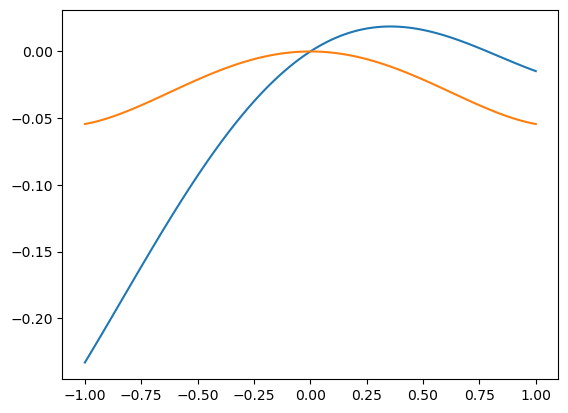

In [92]:
#zad 8
nodes = np.array([0, np.pi/4, np.pi/2])
nodesPrim = np.array([0, 0, np.pi/2])
valuesPrim = np.array([1, 1, 0])
derivs = {0: [0]}



def c(x):
    return np.cos(x)
values = np.array([c(item) for item in nodes])

f = lagrangePoly(x, nodes, values)
g = ermitPoly(x,nodesPrim,valuesPrim,derivs,3)
plt.plot(x, c(x) - f)
plt.plot(x, c(x) - g)
plt.show()


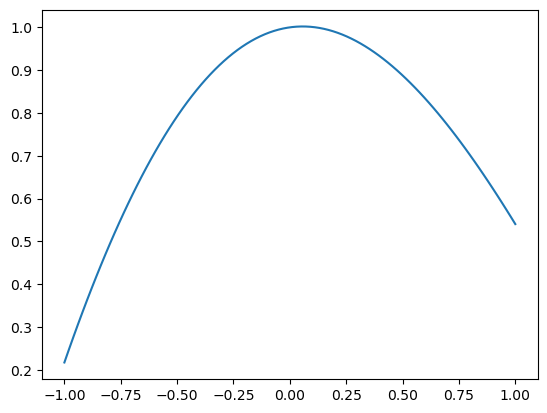

In [97]:
#zad 9

def lagrange_poly(n, x0, h, f, x):
    nodes = np.array([(x0 + i*h) for i in range(n+1)])
    values = np.array([f(nodes[i]) for i in range(n+1)])

    return lagrangePoly(x, nodes, values)
def f(x):
    return np.cos(x)
plt.plot(x,lagrange_poly(5,0,1,f,x))
plt.show()


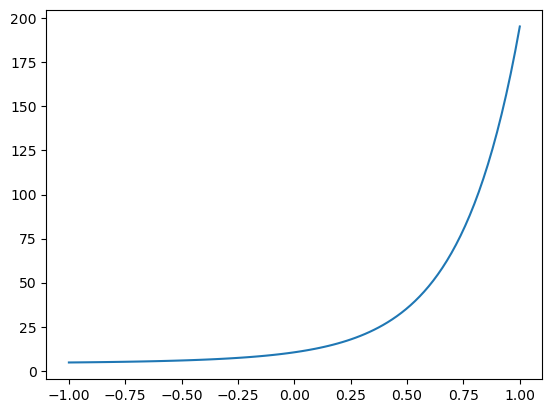

In [75]:
#zad 10
nodes = np.array([0.2, 0.5, 0.7, 0.8, 1])
values = np.array([15.7927, 35.4933, 67.5412, 95.2408, 195.334])

def basisPol(x):
    return np.array([1, np.exp(x), np.exp(2*x), np.exp(3*x), np.exp(4*x)])

n=5
A = np.zeros([n,n])
for i in range(5):
    A[i] = basisPol(nodes[i])

a = np.linalg.solve(A, values)

def g(x):
    q = 0
    for i in range(5):
        q += a[i] * np.exp(i*x)

    return q

plt.plot(x, g(x))
plt.show()


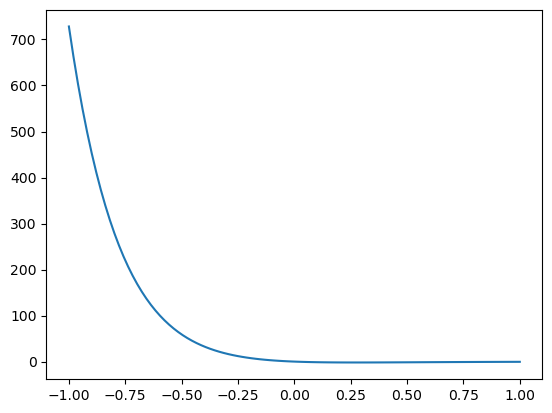

In [76]:
#zad 11
nodes = np.array([0 ,2, 4 ,6 ,8])
values = np.array([0.1 ,0.009, 0.0011, 0.00003 ,0.0000012])

def basisPol(x):
    return np.array([1, np.exp(-x), np.exp(-2*x), np.exp(-3*x), np.exp(-4*x)])

n=5
A = np.zeros([n,n])
for i in range(5):
    A[i] = basisPol(nodes[i])

a = np.linalg.solve(A, values)

def g(x):
    q = 0
    for i in range(5):
        q += a[i] * np.exp(-i*x)

    return q

plt.plot(x, g(x))
plt.show()
